# Cinemática de la partícula

La cinemática es la ciencia que estudia el movimiento sin tomar en cuenta aquello que lo causa, más aún, cinemática de la partícula refiere al estudio del movimiento de objetos cuya dimensión y forma geométrica es irrelevante. 

## Movimiento rectilíneo

Se dice que una partícula está en movimiento rectilíneo si su trayectoria describe una línea recta. Es el caso más simple de análisis cinemático. Para medir las cantidades cinemáticas de una partícula (o cualquier sistema) se hace necesario la introducción de un sistema de referencia, en el caso del movimiento rectilíneo basta con una recta numérica, con un origen y positivos y negativos hacia alguno de sus extremos.

La posición de una partícula se denota habitualmente con la letra $s$ y representa en dónde se ubica la partícula respecto al origen del sistema de referencia utilizado.

La velocidad de una partícula se define como la tasa de variación de la posición con respecto al tiempo, es decir:

\begin{equation}
v = \frac{ds}{dt}
\end{equation}

La aceleración de una partícula se define como la tasa de variación de la velocidad con respecto al tiempo:

\begin{equation}
a = \frac{dv}{dt}
\end{equation}

Si se combinan las ecuaciones anteriores, se obtiene una expresión adicional para la aceleración:

\begin{equation}
a = v \frac{dv}{ds}
\end{equation}

In [5]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
init_printing(use_latex=True)

<hr style="border-top: 3px solid #0000dd;">
<font style="font-weight: bold; font-size: 14px; color: #6666FF">
Una partícula se desplaza a lo largo de una línea recta con la aceleración $a=(12t-3t^{1/2})$ pies/$s^2$, donde $t$ está en segundos. Determine su velocidad y posición como una función del tiempo. Cuando $t=0$, $v=0$ y $s=15$ pies.
</font>

In [6]:
t = symbols("t")
v = symbols("v")
s = symbols("s")
a = (12*t - 3*t**(1/2))

Calculando la velocidad:

$$ a = \frac{dv}{dt} $$

$$ \int_0^v dv = \int_0^t a\, dt$$

In [7]:
ecv = Eq(integrate(1, (v,0,v)), integrate(a, (t,0,t)))
ecv

Para la posición:

$$ v = \frac{ds}{dt} $$

$$ \int_{15}^s ds = \int_0^t v \, dt  $$

In [8]:
ecp = Eq(integrate(1, (s,0,s)), integrate(ecv.rhs, (t,0,t)))
ecp

<hr style="border-top: 3px solid #0000dd;">

<font style="font-weight: bold; font-size: 14px; color: #6666FF">
La aceleración de una partícula que viaja a lo largo de una línea recta es $a=k/v$ donde $k$ es una constante. Si $s=0$, $v=v_0$ cuando $t=0$, determine su velocidad como función del tiempo.
</font>

In [9]:
t = symbols("t")
v = symbols("v")
k = symbols("k")
v0 = symbols("v_0")
a = k/v

Para la velocidad se tiene:

$$ a = \frac{dv}{dt} $$

$$ \int_0^t dt = \int_{v_0}^v \frac{dv}{a} $$

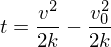

In [10]:
ecv = Eq(integrate(1, (t,0,t)), integrate(1/a, (v,v0,v)))
ecv

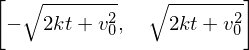

In [11]:
solve(ecv, v)

Por tanto la función de velocidad con respecto al tiempo estará dada por:

$$ v(t) = \pm \sqrt{2 k t + v_{0}^{2}} $$

## Movimiento curvilíneo

<hr style="border-top: 3px solid #0000dd;">

<!-- Hibbeler 12-71 -->

<font style="font-weight: bold; font-size: 14px; color: #6666FF">
La posición de una partícula es $\vec{r} = \left\{ (3t^3 -2t) \mathbf{i} - (4t^{1/2} + t) \mathbf{j} + (3t^2 - 2)\mathbf{k} \right\} $ m, donde $t$ está en segundos, determine la magnitud de la velocidad y aceleración de la partícula cuando $t = 2$s.
</font>

In [19]:
from sympy.matrices import *
t = symbols("t")
r = Matrix([3*t**3 - 2*t, -(4*t**(1/2) +t), 3*t**2 - 2])
v = r.diff(t)
a = v.diff(t)

In [13]:
v.norm().subs(t,2)

In [14]:
a.norm().subs(t,2)

<hr style="border-top: 3px solid #0000dd;">

<!-- Hibbeler F12-22 -->

<font style="font-weight: bold; font-size: 14px; color: #6666FF">
La pelota es pateada desde el punto $A$ con la velocidad inicial $v_A = 10$ m/s. Determine la distancia $R$ y la rapidez con que la pelota golpea el suelo.
</font>

<img src="img/hibb-f12-22.PNG">

$$ x = x_0 + (v_0)_x t$$
$$ y = y_0 + (v_0)_y t - \frac{1}{2}gt^2 $$

In [15]:
t = symbols("t")
R = symbols("R")
g = 9.81
x0 = y0 = 0
v0 = 10
alpha = 30*pi/180
v0x = 10*cos(alpha)
v0y = 10*sin(alpha)
x = x0 + v0x*t
y = y0 + v0y*t - 0.5*g*t**2

In [16]:
sol = solve([x - R, y])
sol

Como se observa hay dos conjuntos de soluciones que satisfacen lo descrito por las ecuaciones, claro está que una de ellas es la solución trivial, es decir, cuando la partícula se encuentra el origen de coordenadas, justamente antes de comenzar su movimiento. Para acceder al resultado del tiempo se tiene:

In [17]:
tf = sol[1][t]

In [18]:
vf = Matrix([ v0x, v0y - g*tf ])
vf.norm()

<hr style="border-top: 3px solid #0000dd;">
